### Playing with GS1_128 Barcodes, and QRCode

This shall be usefull in any company
- needed:
  - for the GUI: Python "de base", Jupyterlab or Jupyterlite
  - to print GS1_128 clean BarCodes: 
      - libraries : pip install python-barcode
      - a workaround to get a proper gs1_ean128: below 'def Ean128legend()'
- to print QRcode:
      -  libraries : pip install qrcode
- to read QRcode via camera: (but example not working on Jupyterlite yet)
      -  libraries : pip install opencv-python
   

In [23]:
# if on Jupyterlite, un-commment this
# import micropip
# await micropip.install("python-barcode")
# await micropip.install("qrcode")

# opencv is in standard included in Jupyterlite 

In [1]:
import barcode  # python-barcode
barcode.PROVIDED_BARCODES

['codabar',
 'code128',
 'code39',
 'ean',
 'ean13',
 'ean13-guard',
 'ean14',
 'ean8',
 'ean8-guard',
 'gs1',
 'gs1_128',
 'gtin',
 'isbn',
 'isbn10',
 'isbn13',
 'issn',
 'itf',
 'jan',
 'nw-7',
 'pzn',
 'upc',
 'upca']

In [2]:
from barcode import EAN13

In [3]:
from barcode.writer import ImageWriter
from IPython.display import SVG, display

In [4]:
EAN = barcode.get_barcode_class('ean13')

In [5]:
my_ean = EAN('5901234123457')

In [6]:
fullname = my_ean.save('ean13_barcodge')

In [7]:
display(SVG(fullname))

In [8]:
gs1_128 = barcode.get_barcode_class('gs1_128')
my_gs1 = gs1_128('3712345678')

In [9]:
fullname = my_gs1.save('gs1_barcoderguwxw')
display(SVG(fullname))

In [10]:
ean = barcode.get('ean13', '123456789102')

In [11]:
ean.get_fullcode()

'1234567891026'

In [12]:
fullname = my_ean.save('ean13_barcodge')

In [13]:
ffff = barcode.get_barcode_class('ean13')
my_ean = ffff('5901234123457')

In [14]:
def Ean128legend(chaine_in, with_spacing= True,print_error=False):
    """Transform a given gs1_128 barecode string into it's barcode legend
    <FC1> or <FNC1> or '\xf1' string can be used to specify a (FNC1)
    example: Ean128legend('10ABCD<FC1>15220412')
    will give: '(10)ABCD(15)220412'  """

    # special characters:
    # on Grand Zebu XL: fc1num = int(207); fc1 = chr(fc1num)
    # <FNC1> car(241) for python_barcode, while grandzebu Code128-v2.0 is 207
    fnc1 = fc1 = '\xf1' 
  
    #gs1 = list of (application identifiers possible , associated maximum length)
    #      'x' convention is for any digit
    gs1=[('00', 18),('01', 14),('02', 14),('10', 20),('1x', 6),('20', 2),
         ('21', 20),('22', 20),('235', 28),('240', 30),('241', 30),('242', 6),('243', 20),
         ('250', 30),('251', 30),('253', 30),('254', 20),('255',25),
         ('30', 8),
         ('310x', 6),('311x', 6),('312x', 6),('313x', 6),('314x', 6),('315x', 6),('316x', 6),
         ('32xx', 6),('33xx', 6),('34xx', 6),('35xx', 6),('36xx', 6),
         ('37', 8),
         ('390x', 15),('391x', 18),('392x', 15),('393x', 18),('394x', 4),('395x', 6),
         ('400', 30),('401', 30),('402', 17),('403', 30),
         ('41x', 13),('420', 20),('421', 12),('422', 3),('423', 15),('424', 3),('425', 15),('426', 3),('427', 3),
         ('4300', 35),('4301', 35),('4307', 2),('430x', 70),
         ('4310', 35),('4311', 35),('4317', 2),('4318', 20),('431x', 70),
         ('4320', 35),('4321', 1),('4322', 1),('4323', 1),('4324', 10),('4325', 10),('4326', 6),
         ('7001', 13),('7002', 30),('7003', 10),('7004', 4),('7005', 12),('7006', 6),('7007', 12),('7008', 3),('7009', 14),
         ('7010', 2),('7011', 10),
         ('7020', 20),('7021', 20),('7022', 20),('7023', 30),
         ('703x', 30),('7040', 4),('71x', 20),('723x', 30),('7240', 20),
         ('8001', 14),('8002', 20),('8003', 30),('8004', 30),('8005', 6),('8006', 18),
         ('8008', 12),('8009', 50),('8010', 30),('8011', 12),('8012', 20),('8013', 25),('8017', 18),
         ('8018', 18),('8019', 10),('8020', 25),('8026', 18),('8110', 70),('81111', 4),('81112', 70),
         ('90', 30),('9x', 90),]
    gs1_ai =  dict(set(gs1))

    # val_res = list of (application identifier,  values) found
    val_res = []
    errors = ""



    #Action 1 : REPLACE "<FC1>" or "<FNC1>" strings per fc1 character
    chaine = chaine_in + ""
    chaine=chaine.replace("<FC1>", fnc1)
    chaine=chaine.replace("<FNC1>", fnc1)

    w = i = int(1)
    ai_res = ""
    # itertee on all character of the given barcode
    while w <= len(chaine):
        #in case a FC1 is seen
        if chaine[w - int(1)] == fc1:
            if ai_res !="" and print_error == True:
                errors += ai_res + " "
                ai_res = ""
        else:
            #feeding ai_res with start of next rubrick token, character per character
            ai_res  += chaine[w - int(1)] + ""

        #search if ai_res[i] has now a matching ai identifier
        ai_found  = ''
        for k in range(0 , len(ai_res) ):
            ai_look = ai_res[:len(ai_res)-k]+"xxxx"[:k]
            if ai_look in gs1_ai and ai_res.isdigit(): ## a match !
                       ai_found = ai_look
                       # print(f'a match:({ai_found}: {gs1_ai[ai_found]:2d})')
                       break

        # if an Application_Identifier has been found, get the Application Identifier value
        if ai_found != '':
            # Application Identifier value is:
            # - limited per next <FC1> or remaining characters of the string
            # - and its maximal authorised lenght
            forward_value = "" + chaine[w:].split(fc1)[0]
            truncated_value = forward_value[:gs1_ai[ai_found]]
            if with_spacing and ai_res == '00':
                truncated_value=truncated_value[0]+" "+truncated_value[1:8]+" "+truncated_value[8:17]+" "+truncated_value[17]                     
            val_res = val_res +[( ai_res, truncated_value)]
            ai_res = ""
            # position w at the last character utilised
            w = w + len(truncated_value)
        w += int(1)

    errors += ai_res + " "
    if errors.strip() != "" and print_error == True:
        print("un-traducted", errors , " in " , chaine_in  )
    legend = "".join(["("+ k[0] + ")"+k[1] for k in val_res])
    return legend


In [15]:
gs1_128 = barcode.get_barcode_class('gs1_128')
my_gs1 = gs1_128("10ABCD"+'\xf1'+"15220412")

In [16]:
options=dict(font_size=12)
filename = ean.save('ean13g',options, text=Ean128legend("10ABCD"+'\xf1'+"15220412",  True))

In [17]:
display(SVG(filename))

In [18]:
z="0012345678901234567"+"5"
my_gs1 = gs1_128(z)
options=dict(font_size = 10, module_width=0.4)
filename = ean.save('ean13g',options, text=Ean128legend(z,  True))
display(SVG(filename))

### from base.py
default_writer_options = {
        "module_width": 0.2,
        "module_height": 15.0,
        "quiet_zone": 6.5,
        "font_size": 10,
        "text_distance": 5.0,
        "background": "white",
        "foreground": "black",
        "write_text": True,
        "text": "",
    }

In [19]:
z="3712<FC1>2000<FC1>15220412"
my_gs1 = gs1_128(z)
options=dict(font_size = 10, module_width=0.4)
filename = ean.save('ean13g',options, text=Ean128legend(z,  True))
display(SVG(filename))

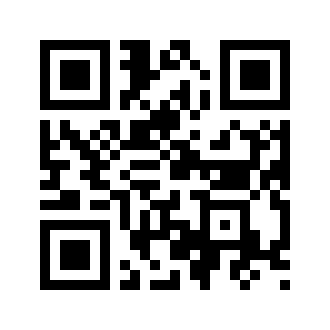

In [20]:
import qrcode
from IPython.display import Image, display
img = qrcode.make('artisou à croûte')
img.save("test.png")
display(Image(filename='test.png'))


In [21]:
# reading QRcode via jupyterlab
# for Jupyterlite, there must be a missing detail 
#    . POC there must be a way: https://github.com/holoviz/panel/blob/main/examples/gallery/streaming_videostream.ipynb
# import the opencv library
import cv2

# define a video capture object
vid = cv2.VideoCapture(0)

detector = cv2.QRCodeDetector()

while True:

    # Capture the video frame by frame
    ret, frame = vid.read()

    data, bbox, straight_qrcode = detector.detectAndDecode(frame)
    if len(data) > 0:
        print(data)

    # Display the resulting frameq
    cv2.imshow('frame', frame)

    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# After the loop release the cap object
vid.release()q
# Destroy all the windows
cv2.destroyAllWindows()

artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
artisou à croûte
